In [1]:
import pandas as pd
import numpy as np
import json

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

## Stadtteile Dresden

In [2]:
with open('./stadtteile-Dresden.json') as data_file:    
    stadtteil_json = json.load(data_file)

In [3]:
stadtteile_osm = []
for i, stadtteil in enumerate(stadtteil_json['features']):
    try:
        stadtteilname = stadtteil['properties']['name']
        stadtteile_osm.append(stadtteilname)
    except:
        continue
        
stadtteile_osm.sort()

In [4]:
stadtteile_osm

[u'Albertstadt',
 u'Blasewitz',
 u'Briesnitz',
 u'B\xfchlau/Wei\xdfer Hirsch',
 u'Cosch\xfctz/Gittersee',
 u'Cotta',
 u'Dresdner Heide',
 u'Flughafen/Industriegebiet Klotzsche',
 u'Friedrichstadt',
 u'Gorbitz-Nord/Neu-Omsewitz',
 u'Gorbitz-Ost',
 u'Gorbitz-S\xfcd',
 u'Gro\xdfzschachwitz',
 u'Gruna',
 u'G\xf6nnsdorf/Pappritz',
 u'Hellerau/Wilschdorf',
 u'Hellerberge',
 u'Hosterwitz/Pillnitz',
 u'Innere Altstadt',
 u'Innere Neustadt',
 u'Johannstadt-Nord',
 u'Johannstadt-S\xfcd',
 u'Kaditz',
 u'Kleinpestitz/Mockritz',
 u'Kleinzschachwitz',
 u'Klotzsche',
 u'Laubegast',
 u'Leipziger Vorstadt',
 u'Leuben',
 u'Leubnitz-Neuostra',
 u'Lockwitz',
 u'Loschwitz/Wachwitz',
 u'L\xf6btau-Nord',
 u'L\xf6btau-S\xfcd',
 u'Mickten',
 u'Nau\xdflitz',
 u'Niedersedlitz',
 u'Pieschen-Nord/Trachenberge',
 u'Pieschen-S\xfcd',
 u'Pirnaische Vorstadt',
 u'Plauen',
 u'Prohlis-Nord',
 u'Prohlis-S\xfcd',
 u'Radeberger Vorstadt',
 u'Reick',
 u'R\xe4cknitz/Zschertnitz',
 u'Sch\xf6nfeld/Schullwitz',
 u'Seevorstadt-O

## Postleitzahlen Dresden

In [5]:
plzs = "01057,01067,01069,01097,01099,01108,01109,01127,01129,01139,01156,01157,01159,01169,01187,01189,01217,01219,01227,01237,01239,01257,01259,01277,01279,01307,01309,01312,01324,01326,01327,01328,01329,01462,01465,01728"

In [6]:
ddplzs = plzs.split(',')

### QGIS Filter output

In [7]:
for plz in ddplzs:
    print('"plz" LIKE "%s" OR' % plz.strip())

"plz" LIKE "01057" OR
"plz" LIKE "01067" OR
"plz" LIKE "01069" OR
"plz" LIKE "01097" OR
"plz" LIKE "01099" OR
"plz" LIKE "01108" OR
"plz" LIKE "01109" OR
"plz" LIKE "01127" OR
"plz" LIKE "01129" OR
"plz" LIKE "01139" OR
"plz" LIKE "01156" OR
"plz" LIKE "01157" OR
"plz" LIKE "01159" OR
"plz" LIKE "01169" OR
"plz" LIKE "01187" OR
"plz" LIKE "01189" OR
"plz" LIKE "01217" OR
"plz" LIKE "01219" OR
"plz" LIKE "01227" OR
"plz" LIKE "01237" OR
"plz" LIKE "01239" OR
"plz" LIKE "01257" OR
"plz" LIKE "01259" OR
"plz" LIKE "01277" OR
"plz" LIKE "01279" OR
"plz" LIKE "01307" OR
"plz" LIKE "01309" OR
"plz" LIKE "01312" OR
"plz" LIKE "01324" OR
"plz" LIKE "01326" OR
"plz" LIKE "01327" OR
"plz" LIKE "01328" OR
"plz" LIKE "01329" OR
"plz" LIKE "01462" OR
"plz" LIKE "01465" OR
"plz" LIKE "01728" OR


## Daten lesen

In [8]:
data = pd.read_csv('2015-08-09-17-49-immo-komplett.csv', encoding='utf-8', dtype={'PLZ': str})

In [9]:
data.index = data.ID

In [10]:
data.head()

,ID,Adresse,Bilder,Features,From,Grundgriss,Grundstück,Haus/Wohnung,Kaltmiete,Kaufpreis,...,Lon,Miete/Kauf,PLZ,Stadt,Stadtteil,Titel,Wohnfläche,Zimmer,von privat,From_UUID
ID,,,,,,,,,,,,,,,,,,,,,
32158558,32158558,"Cotta, Dresden",12,[Einbauküche],Frau Sabine Socha,True,NaN,Wohnung,395 €,NaN,...,NaN,Miete,01157,Dresden,Cotta,"Sonn. ruh. 2-RW m. Wohnküche und EBK, 25 m² gr...",60 m²,2,False,e1b44548-d76b-39d6-a168-11eedfebe535
33436307,33436307,"Leuckartstraße 4, Kaditz, Dresden",6,[Garten],Frau K. Heller,False,NaN,Wohnung,375 €,NaN,...,13.70031,Miete,01139,Dresden,Kaditz,Ruhe und Sonne am Elbepark,55 m²,2,False,d2341837-abcd-3fb1-9976-0fe5445e5eff
34342048,34342048,"Reisewitzer Straße 66, Löbtau-Süd, Dresden",6,[Einbauküche],Frau K. Stelmaszyk,True,NaN,Wohnung,475 €,NaN,...,13.70182,Miete,01159,Dresden,Löbtau-Süd,Schöne 3-Zimmerwohnung im sanierten Altbau mit...,66 m²,3,False,f176e6d5-ae92-3950-a10b-63809cddaeb9
36275407,36275407,"Pfotenhauer Straße 78, Johannstadt-Nord, Dresden",5,[Einbauküche],Frau M. Müller,True,NaN,Wohnung,257 €,NaN,...,13.77354,Miete,01307,Dresden,Johannstadt-Nord,Hübsche Singlewohnung mit hochwertiger Ausstat...,27 m²,1,False,9006fd9e-e9fb-3f05-a584-b641c55f5f5f
37061750,37061750,"Bürgerstraße 77, Pieschen-Süd, Dresden",8,[Einbauküche],Frau K. Stelmaszyk,True,NaN,Wohnung,336 €,NaN,...,13.71924,Miete,01127,Dresden,Pieschen-Süd,Gemütliche 2-Zi.-Wohnung mit Einbauküche,48 m²,2,False,f176e6d5-ae92-3950-a10b-63809cddaeb9


## Daten Cleanen

### Preise cleanen

In [11]:
def preiscleaner(preis, mio=False):
    #print preis
    try:
        p = preis.split()
        p = float(p[0].replace('.', '').replace(',','.'))
        if mio:
            return p/1e6
        else:
            return int(p)
    except:
        return preis

In [12]:
data['Kaufpreis'] = data['Kaufpreis'].apply(preiscleaner, mio=True)
data['Kaltmiete'] = data['Kaltmiete'].apply(preiscleaner)

### Flächen cleanen

In [13]:
def squaremetercleaner(squaremeter):
    #print squaremeter
    try:
        m = squaremeter.split()
        m = float(m[0].replace(',', '.'))
        return int(m)
    except:
        return 0.0    

In [14]:
data[u'Wohnfläche'] = data[u'Wohnfläche'].apply(squaremetercleaner)

### Zimmeranzahl

In [15]:
data[u'Zimmer'] = data[u'Zimmer'].str.replace(',','.').astype('float')

In [16]:
data.head()

,ID,Adresse,Bilder,Features,From,Grundgriss,Grundstück,Haus/Wohnung,Kaltmiete,Kaufpreis,...,Lon,Miete/Kauf,PLZ,Stadt,Stadtteil,Titel,Wohnfläche,Zimmer,von privat,From_UUID
ID,,,,,,,,,,,,,,,,,,,,,
32158558,32158558,"Cotta, Dresden",12,[Einbauküche],Frau Sabine Socha,True,NaN,Wohnung,395,NaN,...,NaN,Miete,01157,Dresden,Cotta,"Sonn. ruh. 2-RW m. Wohnküche und EBK, 25 m² gr...",60,2,False,e1b44548-d76b-39d6-a168-11eedfebe535
33436307,33436307,"Leuckartstraße 4, Kaditz, Dresden",6,[Garten],Frau K. Heller,False,NaN,Wohnung,375,NaN,...,13.70031,Miete,01139,Dresden,Kaditz,Ruhe und Sonne am Elbepark,55,2,False,d2341837-abcd-3fb1-9976-0fe5445e5eff
34342048,34342048,"Reisewitzer Straße 66, Löbtau-Süd, Dresden",6,[Einbauküche],Frau K. Stelmaszyk,True,NaN,Wohnung,475,NaN,...,13.70182,Miete,01159,Dresden,Löbtau-Süd,Schöne 3-Zimmerwohnung im sanierten Altbau mit...,66,3,False,f176e6d5-ae92-3950-a10b-63809cddaeb9
36275407,36275407,"Pfotenhauer Straße 78, Johannstadt-Nord, Dresden",5,[Einbauküche],Frau M. Müller,True,NaN,Wohnung,257,NaN,...,13.77354,Miete,01307,Dresden,Johannstadt-Nord,Hübsche Singlewohnung mit hochwertiger Ausstat...,27,1,False,9006fd9e-e9fb-3f05-a584-b641c55f5f5f
37061750,37061750,"Bürgerstraße 77, Pieschen-Süd, Dresden",8,[Einbauküche],Frau K. Stelmaszyk,True,NaN,Wohnung,336,NaN,...,13.71924,Miete,01127,Dresden,Pieschen-Süd,Gemütliche 2-Zi.-Wohnung mit Einbauküche,48,2,False,f176e6d5-ae92-3950-a10b-63809cddaeb9


## Verkaufsvolumen

In [17]:
verkaufgroup = data[data['Miete/Kauf']=='Kauf'].groupby('From').sum()

In [18]:
verkaufgroup.sort('Kaufpreis', ascending=True, inplace=True)
verkaufgroup['Kaufpreis'].dropna(inplace=True)

In [19]:
verkaufgroup['Kaufpreis'].tail(10)

From
Herr André Markwart              8.030873
 Gernot Poppe                    8.538303
 Richert & Oertel Immobilien    12.569307
 Lutz Schiel                    15.102836
 Gerd Friedemann                17.738563
Frau Nicole Ulbricht            19.949706
Herr André  Findeisen           23.394700
Frau Alexandra Gärtner          30.325000
 Florian Austel                 32.919235
 IMMOVISTA GmbH                 45.503000
Name: Kaufpreis, dtype: float64

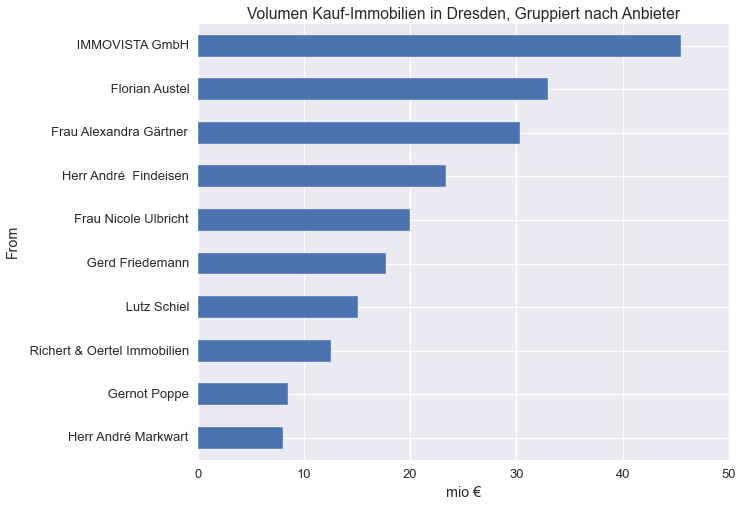

In [20]:
verkaufgroup['Kaufpreis'][-10:].plot(kind='barh', title='Volumen Kauf-Immobilien in Dresden, Gruppiert nach Anbieter')

plt.xlabel(u'mio €')
plt.tight_layout()
plt.savefig('Groupby-Anbieter-KaufpreisSumme.png', dpi=150)

## Anzahl an Immobilien

In [21]:
fromgroup = data.groupby(['From','Miete/Kauf']).count()

In [22]:
fromgroup.sort('ID', ascending=True, inplace=True)

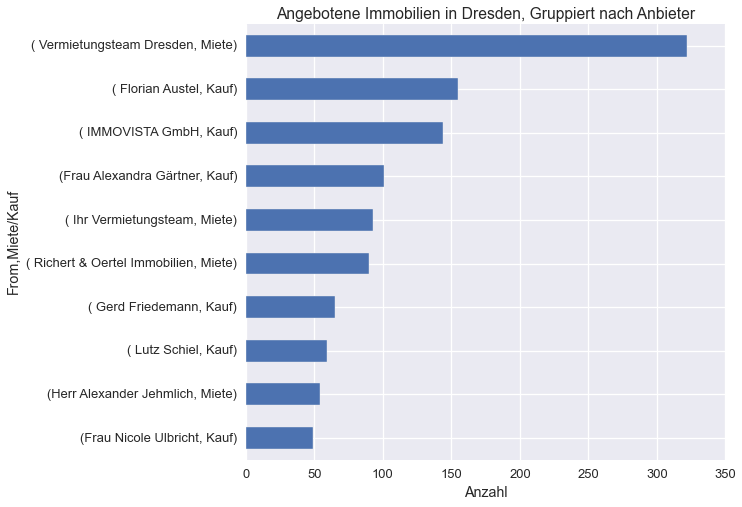

In [23]:
fromgroup['ID'][-10:].plot(kind='barh', title='Angebotene Immobilien in Dresden, Gruppiert nach Anbieter')

plt.xlabel('Anzahl')
plt.tight_layout()
plt.savefig('Groupby-Anbieter.png', dpi=150)

# Immopreis Predictor

In [24]:
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing

In [25]:
mietwohnungen = data[(data['Miete/Kauf']=='Miete') & (data['Haus/Wohnung']=='Wohnung')]
kaufwohnungen = data[(data['Miete/Kauf']=='Kauf') & (data['Haus/Wohnung']=='Wohnung')]

Kaltmieten über 5000€ sind unrealistisch und sind Fehler bei Eingabe auf immoscout24.de (Kauf statt Miete), die werfen wir raus.

In [26]:
mietwohnungen = mietwohnungen[mietwohnungen.Kaltmiete < 5000.0]

## Verkaufspreis schätzen

In [27]:
X = pd.concat([kaufwohnungen[[u'Wohnfläche', u'Zimmer']], pd.get_dummies(kaufwohnungen[u'Stadtteil'])], axis=1)
y = kaufwohnungen['Kaufpreis']

In [28]:
# Robustly fit linear model with RANSAC algorithm
regressor = linear_model.RANSACRegressor(linear_model.LinearRegression())

In [29]:
regressor.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [30]:
inlier_mask = regressor.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
print(u'%.1f%% der Wohnungen als Ausreißer identifiziert' % (sum(outlier_mask)*100.0/(sum(outlier_mask)+sum(inlier_mask))))

12.4% der Wohnungen als Ausreißer identifiziert


In [31]:
y_pred = regressor.predict(X)
kaufwohnungen[u'Kaufpreis (geschätzt)'] = y_pred

/Users/paul/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [32]:
r2_ransac = r2_score(y[inlier_mask], y_pred[inlier_mask])

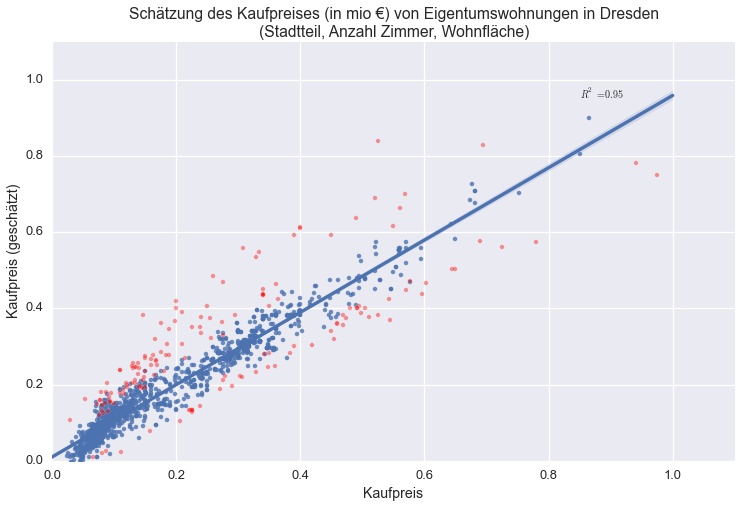

In [33]:
sns.regplot(kaufwohnungen['Kaufpreis'][inlier_mask],
            kaufwohnungen[u'Kaufpreis (geschätzt)'][inlier_mask])
plt.scatter(kaufwohnungen['Kaufpreis'][outlier_mask],
            kaufwohnungen[u'Kaufpreis (geschätzt)'][outlier_mask],
            alpha=0.4,
            c='r')

plt.title(u'Schätzung des Kaufpreises (in mio €) von Eigentumswohnungen in Dresden\n(Stadtteil, Anzahl Zimmer, Wohnfläche)')
plt.text(0.85, 0.95, r'$R^2=%.2f$' % r2_ransac)
plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig('LinReg-Kauf-Wohnung.png', dpi=150)

In [34]:
X.columns[2:]

Index([                          u'Albertstadt',
                                   u'Blasewitz',
                                   u'Briesnitz',
                        u'Bühlau/Weißer Hirsch',
                          u'Coschütz/Gittersee',
             u'Cossebaude/Mobschatz/Oberwartha',
                                       u'Cotta',
                              u'Friedrichstadt',
                          u'Gompitz/Altfranken',
                                 u'Gorbitz-Ost',
                             u'Großzschachwitz',
                                       u'Gruna',
                         u'Hellerau/Wilschdorf',
                         u'Hosterwitz/Pillnitz',
                             u'Innere Altstadt',
                             u'Innere Neustadt',
                            u'Johannstadt-Nord',
                             u'Johannstadt-Süd',
                                      u'Kaditz',
                       u'Kleinpestitz/Mockritz',
                    

In [70]:
len(stadtteile)

61

In [115]:
# Immoscout Datensatz durch gehen und schauen,
# ob die Stadtteile auch den Namen der offiziellen
# Stadtteile tragen
for stadtteil in X.columns[2:]:
    # Da bei einigen nur der Beginn der Namen gleich ist,
    # müssen wir leider alle durch gehen :)
    
    
    
    print(u'✓ %s' % (stadtteil))     

✓ Albertstadt
✓ Blasewitz
✓ Briesnitz
✓ Bühlau/Weißer Hirsch
✓ Coschütz/Gittersee
✓ Cossebaude/Mobschatz/Oberwartha
✓ Cotta
✓ Friedrichstadt
✓ Gompitz/Altfranken
✓ Gorbitz-Ost
✓ Großzschachwitz
✓ Gruna
✓ Hellerau/Wilschdorf
✓ Hosterwitz/Pillnitz
✓ Innere Altstadt
✓ Innere Neustadt
✓ Johannstadt-Nord
✓ Johannstadt-Süd
✓ Kaditz
✓ Kleinpestitz/Mockritz
✓ Kleinzschachwitz
✓ Klotzsche
✓ Langebrück/Schönborn
✓ Laubegast
✓ Leipziger Vorstadt
✓ Leuben
✓ Leubnitz-Neuostra
✓ Lockwitz
✓ Loschwitz/Wachwitz
✓ Löbtau-Nord
✓ Löbtau-Süd
✓ Mickten
✓ Naußlitz
✓ Niedersedlitz
✓ Pieschen-Nord/Trachenberge
✓ Pieschen-Süd
✓ Plauen
✓ Prohlis-Nord
✓ Radeberger Vorstadt
✓ Reick
✓ Räcknitz/Zschertnitz
✓ Seevorstadt-Ost
✓ Seidnitz/Dobritz
✓ Strehlen
✓ Striesen-Ost
✓ Striesen-Süd
✓ Striesen-West
✓ Südvorstadt-Ost
✓ Südvorstadt-West
✓ Tolkewitz/Seidnitz-Nord
✓ Trachau
✓ Weixdorf
✓ Weißig
✓ Wilsdruffer Vorstadt/Seevorstadt-West
✓ Äußere Neustadt (Antonstadt)


In [246]:
X.columns

Index([                           u'Wohnfläche',
                                      u'Zimmer',
                                  u' Blasewitz',
                                  u' Briesnitz',
                       u' Bühlau/Weißer Hirsch',
                         u' Coschütz/Gittersee',
            u' Cossebaude/Mobschatz/Oberwartha',
                                      u' Cotta',
                             u' Friedrichstadt',
                                u' Gorbitz-Ost', 
       ...
                                u'Striesen-Süd',
                               u'Striesen-West',
                             u'Südvorstadt-Ost',
                            u'Südvorstadt-West',
                     u'Tolkewitz/Seidnitz-Nord',
                                     u'Trachau',
                                    u'Weixdorf',
                                      u'Weißig',
       u'Wilsdruffer Vorstadt/Seevorstadt-West',
                u'Äußere Neustadt (Antonstadt)'],
      d

In [248]:
sum(X[u'Äußere Neustadt (Antonstadt)'])

44.0

In [249]:
X_my = np.zeros(103)
X_my[0] = 121.0
X_my[1] = 3.0
X_my[-1] = 1

In [250]:
y_my = regressor.predict(X_my)[0][0]

In [185]:
print('Geschätzter Marktwert: %.3f€' % (1000.0*y_my))

Geschätzter Marktwert: 372.454€


## Kaltmiete schätzen

### Nur mit Wohnfläche und Anzahl der Zimmer

In [37]:
X = mietwohnungen[[u'Wohnfläche', u'Zimmer']]
y = mietwohnungen['Kaltmiete']

In [38]:
reg = linear_model.LinearRegression()

In [39]:
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
y_pred = reg.predict(X)

In [41]:
mietwohnungen[u'Kaltmiete geschätzt'] = y_pred

In [42]:
r_2 = r2_score(y, y_pred)

(0, 3000)

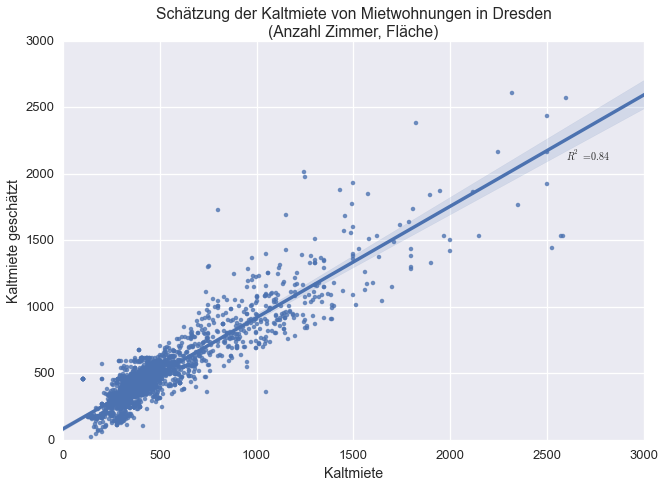

In [43]:
sns.regplot(mietwohnungen['Kaltmiete'] ,mietwohnungen[u'Kaltmiete geschätzt'])
plt.title(u'Schätzung der Kaltmiete von Mietwohnungen in Dresden\n(Anzahl Zimmer, Fläche)')
plt.text(2600, 2100, r'$R^2=%.2f$' % r_2)
plt.xlim(0, 3000)
plt.ylim(0, 3000)

### Vorhersage

In [44]:
m = 155 # m2
z = 4  # Zimmer
print('Kaltmiete für %iR-Wohnung %im^2 in Dresden: %i€' % (z, m, reg.predict([m, z])))

Kaltmiete für 4R-Wohnung 155m^2 in Dresden: 1292€


In [45]:
for z in range(2, 6):
    for m in range(40, 200, 10):
        print('Kaltmiete für %iR-Wohnung %im^2 in Dresden: %i€' % (z, m, reg.predict([m, z])))

Kaltmiete für 2R-Wohnung 40m^2 in Dresden: 265€
Kaltmiete für 2R-Wohnung 50m^2 in Dresden: 362€
Kaltmiete für 2R-Wohnung 60m^2 in Dresden: 458€
Kaltmiete für 2R-Wohnung 70m^2 in Dresden: 554€
Kaltmiete für 2R-Wohnung 80m^2 in Dresden: 650€
Kaltmiete für 2R-Wohnung 90m^2 in Dresden: 746€
Kaltmiete für 2R-Wohnung 100m^2 in Dresden: 843€
Kaltmiete für 2R-Wohnung 110m^2 in Dresden: 939€
Kaltmiete für 2R-Wohnung 120m^2 in Dresden: 1035€
Kaltmiete für 2R-Wohnung 130m^2 in Dresden: 1131€
Kaltmiete für 2R-Wohnung 140m^2 in Dresden: 1227€
Kaltmiete für 2R-Wohnung 150m^2 in Dresden: 1324€
Kaltmiete für 2R-Wohnung 160m^2 in Dresden: 1420€
Kaltmiete für 2R-Wohnung 170m^2 in Dresden: 1516€
Kaltmiete für 2R-Wohnung 180m^2 in Dresden: 1612€
Kaltmiete für 2R-Wohnung 190m^2 in Dresden: 1709€
Kaltmiete für 3R-Wohnung 40m^2 in Dresden: 225€
Kaltmiete für 3R-Wohnung 50m^2 in Dresden: 322€
Kaltmiete für 3R-Wohnung 60m^2 in Dresden: 418€
Kaltmiete für 3R-Wohnung 70m^2 in Dresden: 514€
Kaltmiete für 3R-Wohnu

### Zusätzlich noch Lage (Postleitzahl)

In [46]:
X2 = pd.concat([X, pd.get_dummies(mietwohnungen[u'PLZ'])], axis=1)

In [47]:
reg2 = linear_model.LinearRegression()

In [48]:
reg2.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
y2_pred = reg2.predict(X2)

In [50]:
mietwohnungen[u'Kaltmiete geschätzt (mit Lage)'] = y2_pred

In [51]:
r_22 = r2_score(y, y2_pred)

(0, 3000)

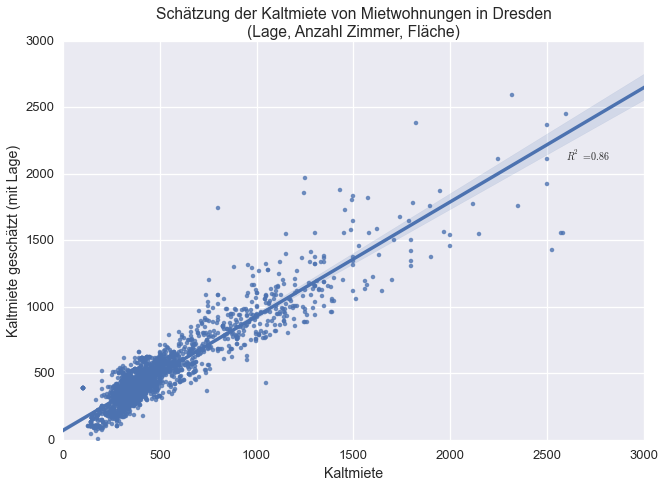

In [52]:
sns.regplot(mietwohnungen['Kaltmiete'] ,mietwohnungen[u'Kaltmiete geschätzt (mit Lage)'])
plt.title(u'Schätzung der Kaltmiete von Mietwohnungen in Dresden\n(Lage, Anzahl Zimmer, Fläche)')
plt.text(2600, 2100, r'$R^2=%.2f$' % r_22)
plt.xlim(0, 3000)
plt.ylim(0, 3000)

## Outlier detection

In [53]:
# Robustly fit linear model with RANSAC algorithm
model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression(), residual_threshold=250.0)

In [54]:
model_ransac.fit(X2, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=250.0, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [55]:
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
print(u'%.1f%% der Wohnungen als Ausreißer identifiziert' % (sum(outlier_mask)*100.0/(sum(outlier_mask)+sum(inlier_mask))))

4.7% der Wohnungen als Ausreißer identifiziert


In [56]:
y2_pred_ransac = model_ransac.predict(X2)

In [57]:
mietwohnungen[u'Kaltmiete geschätzt (mit Lage)'] = y2_pred_ransac.astype('int')

In [58]:
r_22_ransac = r2_score(y[inlier_mask], y2_pred_ransac[inlier_mask])

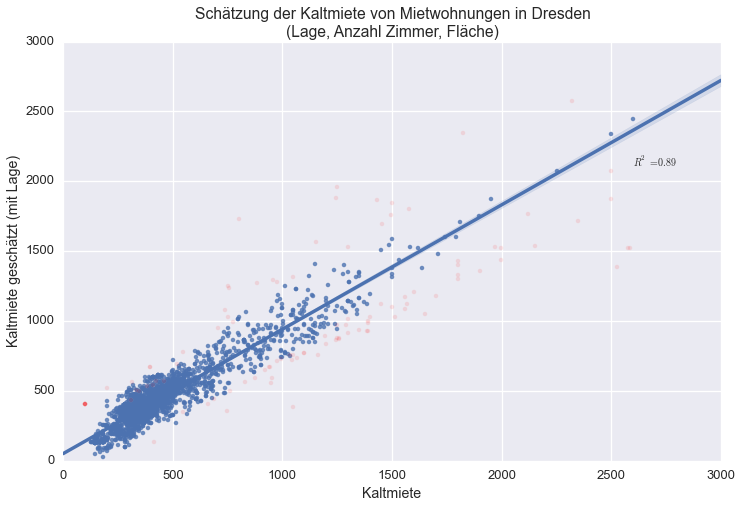

In [59]:
sns.regplot(mietwohnungen['Kaltmiete'][inlier_mask],
            mietwohnungen[u'Kaltmiete geschätzt (mit Lage)'][inlier_mask])
plt.scatter(mietwohnungen['Kaltmiete'][outlier_mask],
            mietwohnungen[u'Kaltmiete geschätzt (mit Lage)'][outlier_mask],
            alpha=0.1,
            c='r')

plt.title(u'Schätzung der Kaltmiete von Mietwohnungen in Dresden\n(Lage, Anzahl Zimmer, Fläche)')
plt.text(2600, 2100, r'$R^2=%.2f$' % r_22_ransac)
plt.xlim(0, 3000)
plt.ylim(0, 3000)
plt.tight_layout()
plt.savefig('LinReg.png', dpi=150)

## Vorhersage für alle Postleitzahlen

### Datencheck: Sind alle PLZ vorhanden?

In [60]:
len(X2.columns[2:]) == len(ddplzs)

True

In [61]:
for plz in X2.columns[2:]:
    if plz in ddplzs:
        print(u'%s ✓' % plz)
    else:
        print(u'%s ✗' % plz)

01057 ✓
01067 ✓
01069 ✓
01097 ✓
01099 ✓
01108 ✓
01109 ✓
01127 ✓
01129 ✓
01139 ✓
01156 ✓
01157 ✓
01159 ✓
01169 ✓
01187 ✓
01189 ✓
01217 ✓
01219 ✓
01227 ✓
01237 ✓
01239 ✓
01257 ✓
01259 ✓
01277 ✓
01279 ✓
01307 ✓
01309 ✓
01312 ✓
01324 ✓
01326 ✓
01327 ✓
01328 ✓
01329 ✓
01462 ✓
01465 ✓
01728 ✓


In [62]:
X2.head(1)

,Wohnfläche,Zimmer,01057,01067,01069,01097,01099,01108,01109,01127,...,01309,01312,01324,01326,01327,01328,01329,01462,01465,01728
ID,,,,,,,,,,,,,,,,,,,,,
32158558,60,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Prediction

In [98]:
for raum in range(2, 6):
    kaltmietenDD = pd.DataFrame()
    A = pd.Series(raum*25.0 * np.ones(len(ddplzs)))
    Z = pd.Series(raum * np.ones(len(ddplzs)))

    X_pred = pd.concat([A, Z, pd.get_dummies(ddplzs)], axis=1)

    kaltmieten = model_ransac.predict(X_pred)

    kaltmietenDD = pd.DataFrame(data={'Wohnfläche': A, 'Zimmer': Z, 'PLZ': ddplzs, 'Kaltmiete': kaltmieten.flatten()})

    kaltmietenDD['KaltmieteProQm'] = kaltmietenDD['Kaltmiete'] / kaltmietenDD['Wohnfläche']

    kaltmietenDD[['PLZ', 'KaltmieteProQm']].to_csv('Kaltmieten%sR.csv' % raum, index=False, float_format='%.2f')

In [99]:
kaltmietenDD.head()

,Kaltmiete,PLZ,Wohnfläche,Zimmer,KaltmieteProQm
0,839.337041,01057,125,5,6.714696
1,955.969820,01067,125,5,7.647759
2,950.327065,01069,125,5,7.602617
3,963.479955,01097,125,5,7.707840
4,982.882935,01099,125,5,7.863063


## Top 10 günstige Wohnungen finden

In [71]:
mietwohnungen[u'Differenz zur Schätzung'] = mietwohnungen[u'Kaltmiete'] - mietwohnungen[u'Kaltmiete geschätzt (mit Lage)']

In [72]:
topmietwohnungen = mietwohnungen.sort(u'Differenz zur Schätzung')

### 3 Raum

In [73]:
topmietwohnungen[topmietwohnungen['Zimmer']==3][['Titel', u'Wohnfläche', 'Kaltmiete', u'Differenz zur Schätzung', 'Stadtteil', 'Zimmer']].head(10)

,Titel,Wohnfläche,Kaltmiete,Differenz zur Schätzung,Stadtteil,Zimmer
ID,,,,,,
75132176,"*** In Schönfeld am Schloss, große Wohnung ode...",192,1152,-413,Schönfeld/Schullwitz,3
80894821,1 WG-Zi. in 3 Zi.- Männer-WG Dresden Pauschalm...,76,200,-318,Mickten,3
83514986,Bei Anmietung bis 31.08.2015 im ersten Jahr nu...,64,100,-304,Gorbitz-Nord/Neu-Omsewitz,3
82205246,Bei Anmietung bis 31.08.2015 im ersten Jahr nu...,64,100,-304,Gorbitz-Nord/Neu-Omsewitz,3
82205245,Bei Anmietung bis 31.08.2015 im ersten Jahr nu...,64,100,-304,Gorbitz-Nord/Neu-Omsewitz,3
82205247,Bei Anmietung bis 31.08.2015 im ersten Jahr nu...,64,100,-304,Gorbitz-Nord/Neu-Omsewitz,3
82205256,Bei Anmietung bis 31.08.2015 im ersten Jahr nu...,64,100,-304,Gorbitz-Nord/Neu-Omsewitz,3
82205253,Bei Anmietung bis 31.08.2015 im ersten Jahr nu...,64,100,-304,Gorbitz-Nord/Neu-Omsewitz,3
82205251,Bei Anmietung bis 31.08.2015 im ersten Jahr nu...,64,100,-304,Gorbitz-Nord/Neu-Omsewitz,3


### 4 Raum

In [74]:
topmietwohnungen[topmietwohnungen['Zimmer']==4][['Titel', u'Wohnfläche', 'Kaltmiete', u'Differenz zur Schätzung', 'Stadtteil', 'Zimmer']].head(10)

,Titel,Wohnfläche,Kaltmiete,Differenz zur Schätzung,Stadtteil,Zimmer
ID,,,,,,
83450827,4-Zimmer-Penthouse Provisionsfrei,200,800,-932,Innere Altstadt,4
80967575,3 Ebenen in schöner Altbauvilla suchen Mieter/in,226,1250,-706,Bühlau/Weißer Hirsch,4
77009661,LOFTWOHNUNG !!!! Raumaufteilung nach Wunsch !!!,230,1245,-632,Reick,4
80509668,"4,0-Zimmerwohnung mit Balkon!",154,957,-338,Bühlau/Weißer Hirsch,4
81958445,"NEU-SANIERTE 4,5-Zimmer-Wohnung im TEILSANIERT...",126,750,-281,Löbtau-Nord,4
83472021,Weißer Hirsch Dresden,149,1013,-237,Bühlau/Weißer Hirsch,4
80856230,"komfortable 4-Raumwohnung mit zentralem Flur, ...",131,775,-220,Pieschen-Nord/Trachenberge,4
83187702,bezugsfertiges Angebot für Srudenten/Azubis- c...,77,300,-209,Strehlen,4
81894716,Viel Platz in der Villa Saxonia!,157,1120,-203,Bühlau/Weißer Hirsch,4


### 5 Raum

In [75]:
topmietwohnungen[topmietwohnungen['Zimmer']==5][['Titel', u'Wohnfläche', 'Kaltmiete', u'Differenz zur Schätzung', 'Stadtteil', 'Zimmer']].head(10)

,Titel,Wohnfläche,Kaltmiete,Differenz zur Schätzung,Stadtteil,Zimmer
ID,,,,,,
83240576,"HAUSFLAIR! Individuelle, großzügige Wohnung mi...",160,750,-497,Weixdorf,5
83467178,Wohnen in denkmalgeschützter 3 Familien Villa ...,220,1430,-433,Bühlau/Weißer Hirsch,5
79267832,Wohnen und Büro in Einem,154,885,-386,Striesen-Süd,5
83458111,"Auszubildende und Studenten willkommen, 100  ...",95,393,-208,Leuben,5
78209137,"Endlich wieder ne 5-R-Whg.! 3 Balkone, gute Au...",153,980,-205,Seidnitz/Dobritz,5
82698033,Traumhafte 5-Zimmer-Maisonette-Wohnung mit eig...,150,975,-165,Leubnitz-Neuostra,5
82580863,attraktive 5 Raumwohnung in Dresden Langebrück,149,953,-139,Seevorstadt-Ost,5
82752578,Große Etagenwohnung in Langebrück! Erstbezug n...,152,999,-121,Langebrück/Schönborn,5
77822044,"Provisionsfrei! 140m², Küche, Luxusbäder",144,950,-120,Pieschen-Nord/Trachenberge,5


Fragen? @Balzer82